<a href="https://colab.research.google.com/github/SvgPrizrak/ML_Sber_Homework/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22hw02_data_analysis%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №2. Базовый анализ данных

Будем работать с датасетом пассажиров Титаника:

In [ ]:
!gdown 1Uf-MuLrsKb4p9GUKKmVYvTT_ZRO_0Kw5

Downloading...
From: https://drive.google.com/uc?id=1Uf-MuLrsKb4p9GUKKmVYvTT_ZRO_0Kw5
To: /content/titanic_train.csv
100% 60.3k/60.3k [00:00<00:00, 65.3MB/s]


Подключим нужные библиотеки:

In [ ]:
import seaborn as sns
import pandas as pd

Считаем данные:

In [ ]:
df = pd.read_csv('titanic_train.csv', index_col='PassengerId')
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Заполним пропуски медианой (для числового столбца) и модой (для строкового):

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

## Часть 1. Анализ табличных данных

Ваша задача - провести исследование данных, выполняя предложенные задачки:

### 1. Основа

Сколько представителей каждого пола находилось на борту?

In [ ]:
# на всякий случай убедимся, что в данных нет дубликатов
df.duplicated().sum()

0

In [ ]:
# проверим, что в необходимых для анализа переменных нет пустых значений
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [ ]:
# Ваш код здесь - 577 мужчин и 314 женщин
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### 2. Классовый вопрос


Найдите количества погибших и выживших по переменной `Pclass` (социально-экономический статус)

In [ ]:
# Ваш код здесь
p_class_survived_df = df.groupby(['Pclass', 'Survived']).agg({'Name': 'count'}).unstack()
p_class_survived_df.columns = ['Not Survived', 'Survived']
p_class_survived_df

,Not Survived,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


Дополнительно - то же самое, но еще учитывая пол:

In [ ]:
# Ваш код здесь
p_class_sex_survived_df = df.groupby(['Pclass', 'Sex', 'Survived']).agg({'Name': 'count'}).unstack()
p_class_sex_survived_df.columns = ['Not Survived', 'Survived']
p_class_sex_survived_df

Not Survived  Survived
Pclass Sex                           
1      female             3        91
       male              77        45
2      female             6        70
       male              91        17
3      female            72        72
       male             300        47

### 3. Посмотрим на деньги

Сколько в среднем заплатил один пассажир?

In [ ]:
# Ваш код здесь
df['Fare'].mean()

32.204207968574636

Найдите дисперсию этой величины.

In [ ]:
# Ваш код здесь - можно через дисперсию, можно через СКО
df['Fare'].var(), df['Fare'].std() ** 2

(2469.436845743116, 2469.436845743116)

Сколько все пассажиры заплатили в сумме?

In [ ]:
# Ваш код здесь
df['Fare'].sum()

28693.9493

### 4. Зависимость от возраста

Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики?

Пусть "молодые" - те, кто моложе 30, а "старики" - те, кто старше 60.

In [ ]:
# Ваш код здесь
# разделим людей на молодых (Young), стариков (Old) и остальных (Other) с помощью функции
df.loc[df['Age'] < 30, 'Age_status'] = "Young"
df.loc[df['Age'] > 60, 'Age_status'] = "Old"
df['Age_status'].fillna("Other", inplace=True)

# после чего вычислим процент выживших среди каждой категории - как видно процент выживших среди молодых действительно выше
df[df['Survived'] == 1].groupby('Age_status')['Name'].count() * 100 / df.groupby('Age_status')['Name'].count()

Age_status
Old      22.727273
Other    41.883117
Young    37.076649
Name: Name, dtype: float64

### 5. Зависимость от пола

Проверьте правда ли, что женщины выживали чаще мужчин:

In [ ]:
# Ваш код здесь - да, процент выживших среди женщин намного выше
df[df['Survived'] == 1].groupby('Sex')['Name'].count() * 100 / df.groupby('Sex')['Name'].count()

Sex
female    74.203822
male      18.890815
Name: Name, dtype: float64

### 6. Цена жизни

Найдите средние значения и дисперсии стоимости билетов для спасенных и погибших:

In [ ]:
# Ваш код здесь - чем выше цена билета, тем выше вероятность выживания пассажира
pd.DataFrame({'Mean Ticket Price': [df[df['Survived'] == 1]['Fare'].mean(), df[df['Survived'] == 0]['Fare'].mean()],
              'Ticket Price Variance': [df[df['Survived'] == 1]['Fare'].var(), df[df['Survived'] == 0]['Fare'].var()]},
             index=['Survived', 'Not Survived'])

,Mean Ticket Price,Ticket Price Variance
Survived,48.395408,4435.160158
Not Survived,22.117887,985.219509


### 7. Лучшее - детям?

Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?

In [ ]:
# Ваш код здесь - средний возраст мужчин в каждом из классов обслуживания выше на несколько лет (от 1,8 до 5 лет)
df.groupby(['Pclass', 'Sex']).agg({'Age': 'mean'}).unstack()

Age           
Sex        female       male
Pclass                      
1       33.978723  38.995246
2       28.703947  30.512315
3       23.572917  26.911873

## Часть 2. Визуализация данных

### 1. Постройте попарные зависимости информативных признаков

К информативных признакам относим колонки `Survived`, `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare` и `Embarked`

`Name`, `Ticket` и `Cabin` не являются информативными для анализа данных, в них по сути находятся уникальные идентификаторы - имя, номер билета и номер каюты. По ним делать предсказания бесполезно.

В построении графика вам помогут метод `scatter_matrix ` Pandas или функция `pairplot` Seaborn:

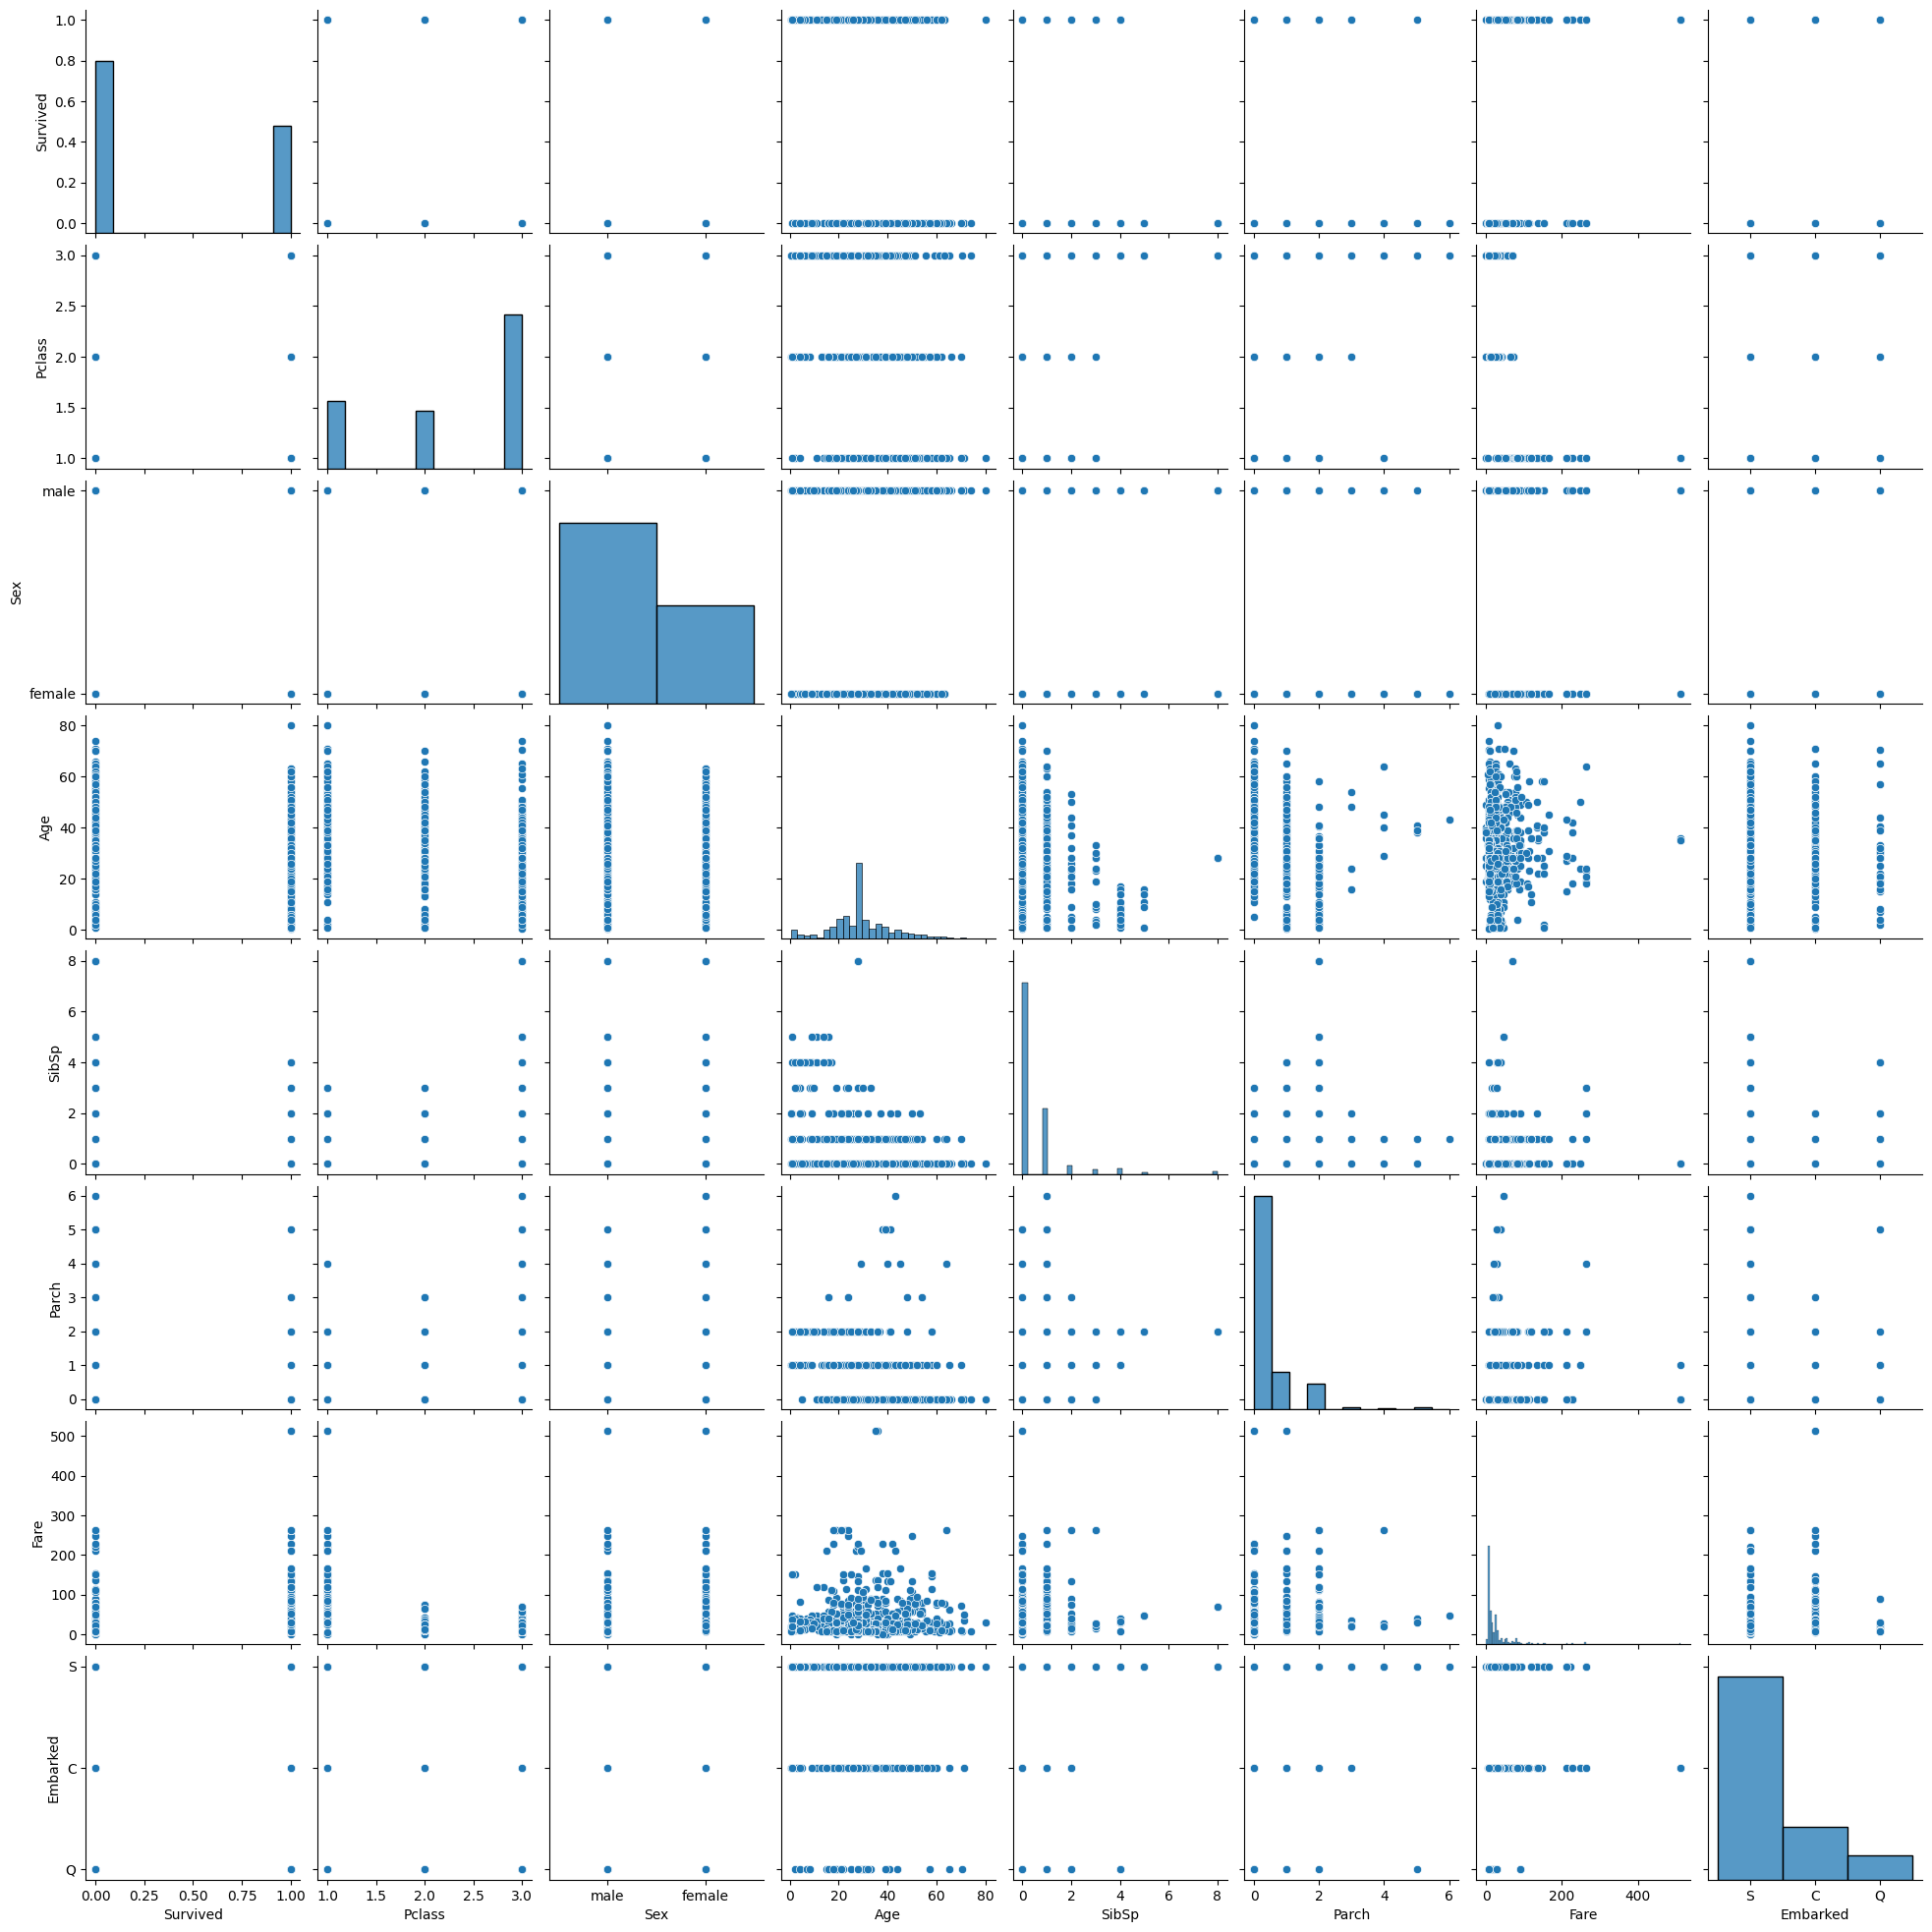

In [ ]:
# Ваш код здесь
# поскольку Embarked и Sex не являются численными признаками, то их следует добавить в аргумент vars функции sns.pairplot
sns.pairplot(df, vars=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

### 2. Рассмотрите как распределена плата за билет (`Fare`) для разных классов зависит от класса каюты (`Pclass`)

В этом поможет `sns.boxplot`:

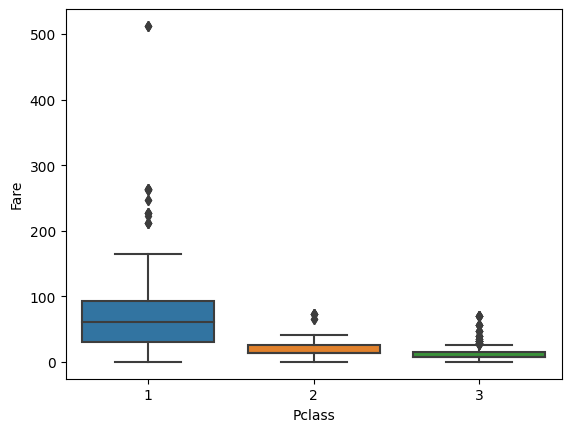

In [ ]:
# Ваш код здесь - чем выше класс (3 класс - "эконом", 2 класс - "средний", 1 - "бизнес"), тем дороже билет, что видно как по выбросам, так и по IQR (что логично)
sns.boxplot(data=df, x ='Pclass', y='Fare');

### 3. Посмотрим на соотношение погибших и выживших в зависимости от пола

Отобразите c помощью `sns.countplot` c аргументом `hue`:

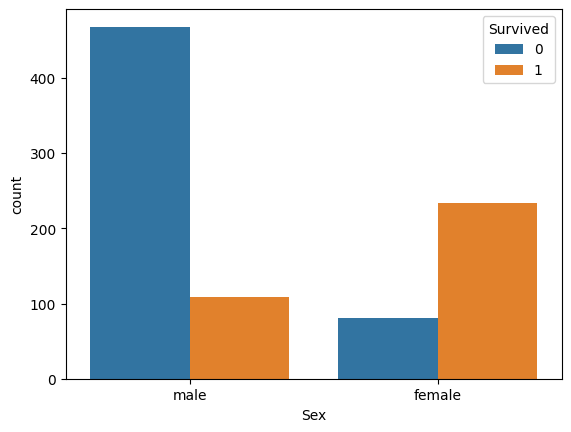

In [ ]:
# Ваш код здесь - определенно процент погибших среди мужчин намного выше процента погибших среди женщин
sns.countplot(data=df, x='Sex', hue='Survived');

### 4. Каково соотношение погибших и выживших в зависимости от класса каюты?

Отобразите c помощью `sns.countplot` c аргументом `hue`:

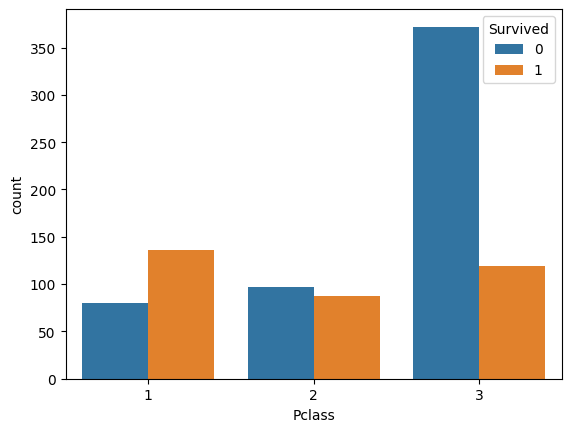

In [ ]:
# Ваш код здесь - пассажиры 3 класса в процентном соотношении погибли намного больше, нежели в 1 и 2
# чем выше класс (от 3 до 1, и - вероятно, богаче пассажир), тем выше вероятность, что он выжил
sns.countplot(data=df, x='Pclass', hue='Survived');

### 5. Как выживаемость зависит от возраста пассажира?

Проверьте (графически) предположение, что молодые чаще выживали:

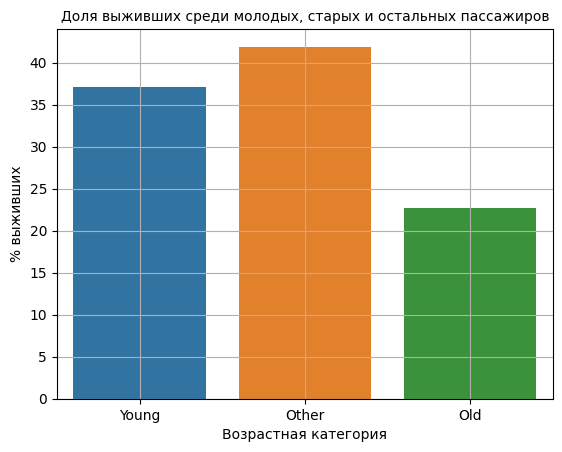

In [ ]:
# Ваш код здесь
# процент выживаемости среди молодых куда выше, чем у пожилых
import matplotlib.pyplot as plt
plt.title('Доля выживших среди молодых, старых и остальных пассажиров', size=10)
sns.barplot(data=df, x='Age_status', y='Survived', errorbar=None, estimator=lambda x: sum(x) / len(x) * 100);
plt.xlabel('Возрастная категория')
plt.ylabel('% выживших')
plt.grid()
plt.show()

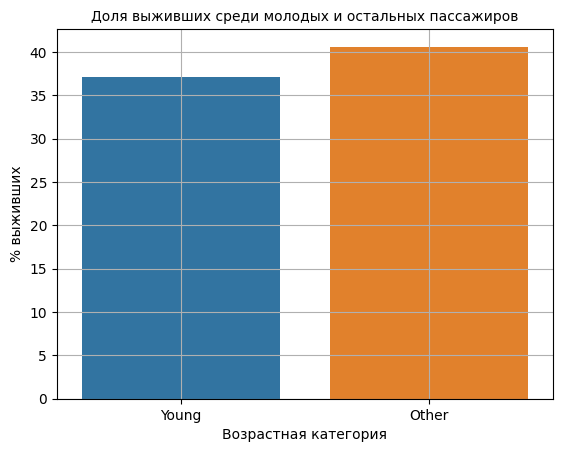

In [ ]:
# можем также проверить гипотезу, что молодые в принципе чаще выживали, чем остальные
# вот здесь процент выживших практически одинаковый (но не в пользу молодых, что не подтверждает гипотезу)
df.loc[df['Age_status'] == 'Old', 'Age_status'] = 'Other'
plt.title('Доля выживших среди молодых и остальных пассажиров', size=10)
sns.barplot(data=df, x='Age_status', y='Survived', errorbar=None, estimator=lambda x: sum(x) / len(x) * 100);
plt.xlabel('Возрастная категория')
plt.ylabel('% выживших')
plt.grid()
plt.show()

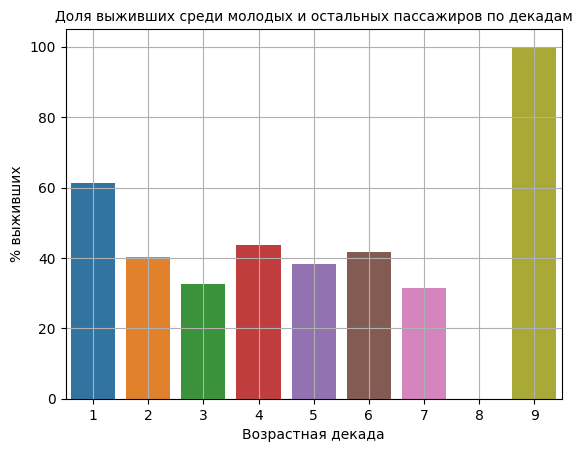

In [ ]:
# можно также проверить выживаемость пассажиров по десятилетиям (декадам), для чего и создадим такую колонку
df['Age_decade'] = (df['Age'] // 10).astype('int') + 1

# на графике видно, что больший процент выживших среди пассажиров от 0 до 10 лет, от 10 до 20 лет, от 40 до 50 лет, от 60 до 70 лет, от 80 до 90 лет не берем в учет (там 1 пассажир)
# на графике видно, что меньший процент выживших среди пассажиров от 20 до 30 лет, от 50 до 60 лет, от 70 до 80 лет
# если смотреть по декадам, то гипотеза о том, что молодые выживают чаще не подтверждается
plt.title('Доля выживших среди молодых и остальных пассажиров по декадам', size=10)
sns.barplot(data=df, x='Age_decade', y='Survived', errorbar=None, estimator=lambda x: sum(x) / len(x) * 100);
plt.xlabel('Возрастная декада')
plt.ylabel('% выживших')
plt.grid()
plt.show()